In [1]:
import fnmatch
import os
import read_mp3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# http://stackoverflow.com/questions/2186525/use-a-glob-to-find-files-recursively-in-python
# Here's the Python 3.4 way...
matches = []
for root, dirnames, filenames in os.walk('music'):
    for filename in fnmatch.filter(filenames, '*.mp3'):
        matches.append(os.path.join(root, filename))
# tunes_list = glob.glob('music/*.mp3')


audio, sample_rate = read_mp3.ffmpeg_load_audio(matches[0])

In [6]:
audio[:,:20000]

array([[ 0.        ,  0.        ,  0.        , ..., -0.45796075,
        -0.47401348, -0.48908964],
       [ 0.        ,  0.        ,  0.        , ..., -0.31727043,
        -0.28098392, -0.26096377]], dtype=float32)

In [8]:
audio.shape

(2, 8673408)

/home/rory/anaconda3/envs/tunes/lib/python3.4/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


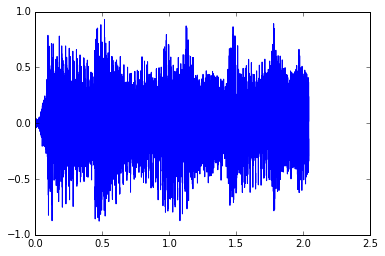

In [10]:
import numpy as np
audio, sample_rate = read_mp3.ffmpeg_load_audio(matches[0])

y = audio[0,1e4:1e5]
x = np.arange(len(y))/sample_rate

plt.plot(x, y)

/home/rory/anaconda3/envs/tunes/lib/python3.4/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


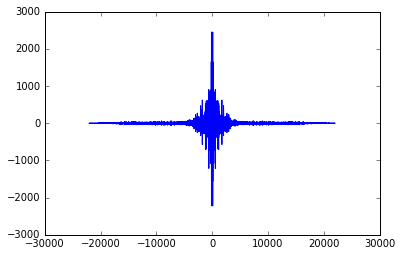

In [11]:
y_fft = np.fft.fft(y)

x_freqs = np.fft.fftfreq(len(y), 1/sample_rate)

plt.plot(x_freqs, y_fft)

Try out the new ffmpeg op in TensorFlow